## Isotonic Regression

by :  [Daniel Jiménez](cjimenez187@aol.com)

In [5]:
import pandas as pd
import numpy as np
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LinearRegression
import warnings
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn.utils import check_random_state
warnings.filterwarnings("ignore")

In [12]:
n = 300
x = np.arange(n)
rs = check_random_state(0)
y = rs.randint(-150, 150, size=(n,)) + 150. * np.log1p(np.arange(n))

In [13]:
ir = IsotonicRegression()

y_ = ir.fit_transform(x, y)

lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

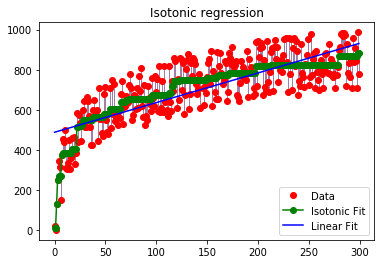

In [14]:
segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))

fig = plt.figure()
plt.plot(x, y, 'r.', markersize=12)
plt.plot(x, y_, 'g.-', markersize=12)
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.gca().add_collection(lc)
plt.legend(('Data', 'Isotonic Fit', 'Linear Fit'), loc='lower right')
plt.title('Isotonic regression')
plt.show()